In [22]:
from skimage import io, transform
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import signal


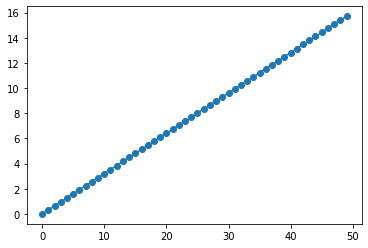

In [23]:
x = np.linspace(0, 5.*np.pi, 50)
plt.plot(x,"o-")

Text(0.5, 0, 'x_value')

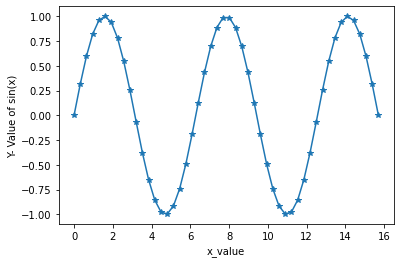

In [24]:
plt.figure()
y = np.sin(x)
plt.plot(x, y,"*-")
plt.ylabel("Y- Value of sin(x)")
plt.xlabel("x_value")

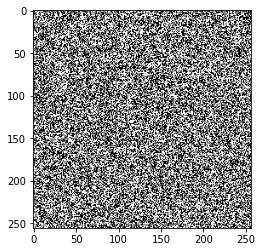

In [25]:
plt.figure()
rand_img = np.random.rand(256, 256)
plt.imshow(rand_img>0.5,cmap='gray')


Text(0.5, 1.0, 'Lena in RGB')

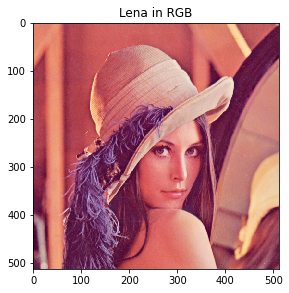

In [26]:
image = io.imread("./imgs/lena.png")
fig, ax = plt.subplots()
io.imshow(image) # Preco toto funguje.
plt.title('Lena in RGB')



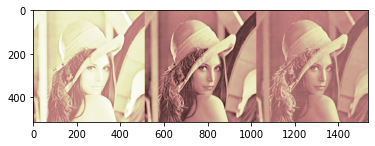

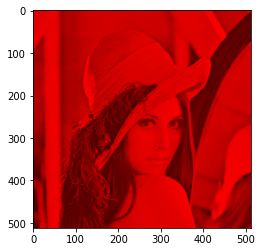

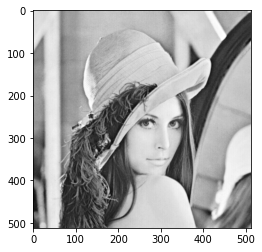

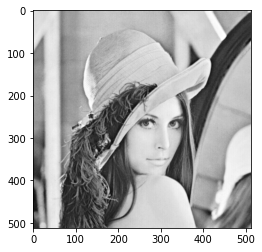

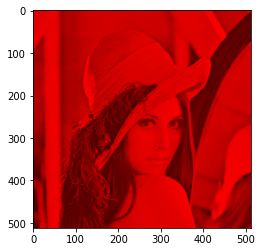

In [38]:
plt.figure()
plt.imshow(np.concatenate((image[:,:,0], image[:,:,1], image[:,:,2]),1),cmap='pink')
image_R = np.array(image)
image_R[:,:,1:] = 0
plt.figure()
plt.imshow(image_R)
plt.figure()
img = image_R[:,:,0].astype(dtype=np.uint8)
plt.imshow(image[:,:,0],cmap='gray')

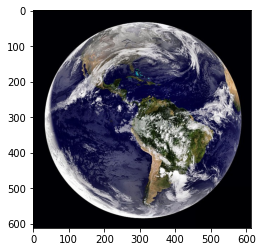

In [29]:
image_earth = io.imread("./imgs/earth.jpg")
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image_earth)
ax.set_aspect('equal')
plt.savefig('earth.png')

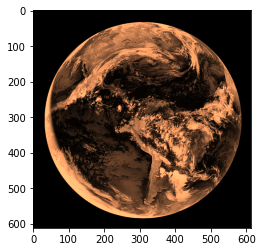

In [39]:
image_earth = imageio.imread("imgs/earth.jpg")
i_gray = 0.2126 * image_earth[:,:,0] + 0.7152 * image_earth[:,:,1] + 0.0722 * image_earth[:,:,2]
i_gray = i_gray.astype(dtype=np.uint8)
plt.figure()
plt.imshow(i_gray, cmap='copper')


Sum error between methods:  3802
Average error:  0.010151010295185612


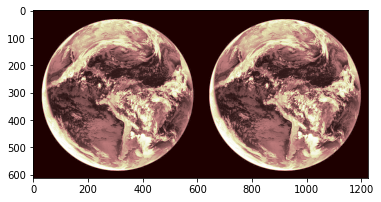

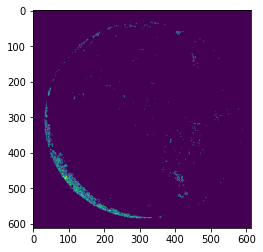

In [40]:
from skimage.color import rgb2gray
#Y = 0.2125 R + 0.7154 G + 0.0721 B scikit
i_gray2 = (rgb2gray(image_earth)*255).astype(dtype=np.uint8)
print("Sum error between methods: ", np.sum((i_gray2 -i_gray)**2))
print("Average error: ", np.sum((i_gray2 -i_gray)**2)/i_gray2.size)

plt.figure()
plt.imshow(np.concatenate((i_gray, i_gray2),1),cmap='pink')
plt.figure()
plt.imshow(i_gray-i_gray2)

c:\programdata\anaconda3\envs\pythonproject2\lib\site-packages\skimage\transform\_warps.py:176: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  out = warp(image, tform, output_shape=output_shape, order=order,


Sum error between methods:  176.50203921197817
Average error:  0.0004712451386538782


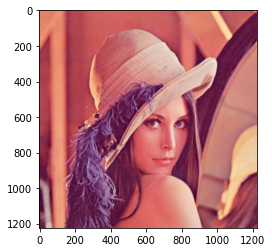

In [49]:
I_resized = transform.resize(image, np.array(i_gray.shape)*2,order=1)
I_resized2 = transform.resize(image, np.array(i_gray.shape)*2, order=2)
print("Sum error between methods: ", np.sum((I_resized -I_resized2)**2))
print("Average error: ", np.sum((I_resized -I_resized2)**2)/i_gray2.size)

plt.figure()
plt.imshow(I_resized)

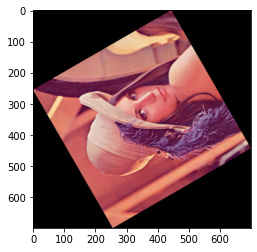

In [44]:
I_rotated = transform.rotate(image, 120 ,resize=True)
plt.figure()
plt.imshow(I_rotated)

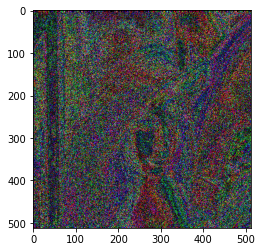

In [52]:
plt.figure()
plt.imshow(image**14)

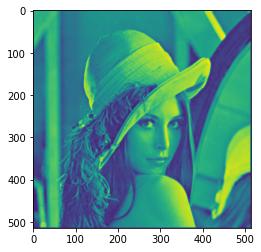

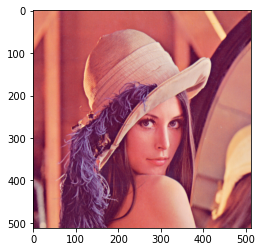

In [54]:
plt.figure()
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [1]]) / 16);
plt.imshow(signal.convolve2d(rgb2gray(image),g))
plt.figure()
plt.imshow(image)

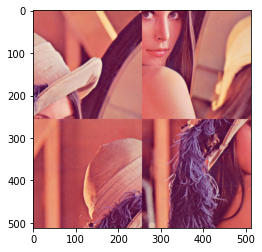

In [56]:
all_parts = [image[:256, :256], image[:256, 256:], image[256:, :256], image[256:, 256:]]
np.random.shuffle(all_parts)
x=np.concatenate((all_parts[0], all_parts[1]), axis=0)
y=np.concatenate((all_parts[2], all_parts[3]), axis=0)
final = np.concatenate((x, y), axis=1)
plt.imshow(final)